In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
#libraries for preprocessing
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
#libraries for evaluation
from sklearn.metrics import mean_squared_log_error,r2_score,mean_squared_error
from sklearn.model_selection import train_test_split
#libraries for models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import LassoCV,RidgeCV
from yellowbrick.regressor import AlphaSelection
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df=pd.read_csv("/content/drive/MyDrive/DATASET/used_car_data.zip")
df.shape

(426880, 26)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   url           426880 non-null  object 
 2   region        426880 non-null  object 
 3   region_url    426880 non-null  object 
 4   price         426880 non-null  int64  
 5   year          425675 non-null  float64
 6   manufacturer  409234 non-null  object 
 7   model         421603 non-null  object 
 8   condition     252776 non-null  object 
 9   cylinders     249202 non-null  object 
 10  fuel          423867 non-null  object 
 11  odometer      422480 non-null  float64
 12  title_status  418638 non-null  object 
 13  transmission  424324 non-null  object 
 14  VIN           265838 non-null  object 
 15  drive         296313 non-null  object 
 16  size          120519 non-null  object 
 17  type          334022 non-null  object 
 18  pain

In [5]:
#Reindexing DataFrame so that price feature will display at last
df= df.reindex(columns=['id', 'url', 'region', 'region_url', 'year', 'manufacturer',
       'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'vin', 'drive', 'size', 'type', 'paint_color',
       'image_url', 'description', 'county', 'state', 'lat', 'long','price'])

In [6]:
df.head()

,id,url,region,region_url,year,manufacturer,model,condition,cylinders,fuel,...,size,type,paint_color,image_url,description,county,state,lat,long,price
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,6000
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,11900
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,21000
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,1500
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,4900


# 1) Removed Irrelevant features

In [7]:
df1=df.copy()

In [8]:
df1.head()

,id,url,region,region_url,year,manufacturer,model,condition,cylinders,fuel,...,size,type,paint_color,image_url,description,county,state,lat,long,price
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,6000
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,11900
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,21000
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,1500
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,4900


In [9]:
drop_columns = ['id','url', 'region_url', 'title_status', 'size', 'image_url', 'description', 'lat','long','vin','county','state']
df1 = df1.drop(columns = drop_columns)

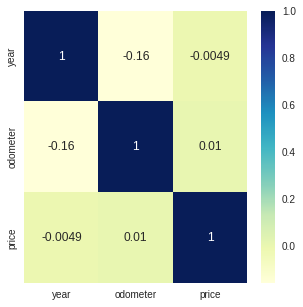

In [10]:
plt.figure(figsize = (5,5))
sns.heatmap(df1.corr(), annot = True ,cmap = 'YlGnBu')
plt.show()

# 2) Dealing with missing values

In [11]:
df1.isnull().sum()

region               0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
transmission      2556
drive           130567
type             92858
paint_color     130203
price                0
dtype: int64

In [12]:
df1.dtypes

region           object
year            float64
manufacturer     object
model            object
condition        object
cylinders        object
fuel             object
odometer        float64
transmission     object
drive            object
type             object
paint_color      object
price             int64
dtype: object

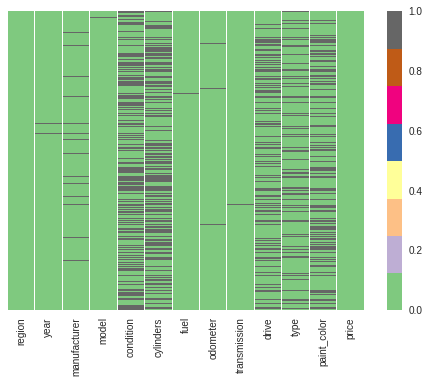

In [13]:
#heatmap to identify nulll values using graph
sns.heatmap(df1.isnull(),yticklabels=False,cbar=True,cmap='Accent')

In [14]:
df1 = df1.dropna(subset=['year', 'odometer','manufacturer','model'])

In [15]:
df1.shape

(399883, 13)

In [16]:
condition_counts =df1['condition'].value_counts()
condition_counts.head()

good         115129
excellent     95123
like new      19970
fair           5918
new            1128
Name: condition, dtype: int64

In [17]:
print(df1.condition.unique())

['good' 'excellent' 'fair' 'like new' 'new' nan 'salvage']


In [18]:
df1["condition"].replace(np.nan,"fair",inplace = True)

In [19]:
df1.isnull().sum()

region               0
year                 0
manufacturer         0
model                0
condition            0
cylinders       164298
fuel              2009
odometer             0
transmission      1608
drive           119566
type             83236
paint_color     119318
price                0
dtype: int64

In [20]:
df1.fuel.unique()

array(['gas', 'other', 'diesel', 'hybrid', nan, 'electric'], dtype=object)

In [21]:
df1['fuel'].value_counts()

gas         337115
other        28627
diesel       25448
hybrid        5077
electric      1607
Name: fuel, dtype: int64

In [22]:
df1["fuel"].replace(np.nan,"gas",inplace = True)

In [23]:
df1.isnull().sum()

region               0
year                 0
manufacturer         0
model                0
condition            0
cylinders       164298
fuel                 0
odometer             0
transmission      1608
drive           119566
type             83236
paint_color     119318
price                0
dtype: int64

In [24]:
df1.fuel.unique()

array(['gas', 'other', 'diesel', 'hybrid', 'electric'], dtype=object)

In [25]:
df1['cylinders'].value_counts()

6 cylinders     89674
4 cylinders     73936
8 cylinders     67542
5 cylinders      1546
10 cylinders     1321
other             904
3 cylinders       549
12 cylinders      113
Name: cylinders, dtype: int64

In [26]:
df1["cylinders"].replace(np.nan,"6 cylinders", inplace = True)

In [27]:
df1.transmission.unique()

array(['other', 'automatic', 'manual', nan], dtype=object)

In [28]:
df1['transmission'].value_counts()

automatic    316997
other         60000
manual        21278
Name: transmission, dtype: int64

In [29]:
df1["transmission"].replace(np.nan,"automatic", inplace = True)

In [30]:
df1.drive.unique()

array([nan, 'rwd', '4wd', 'fwd'], dtype=object)

In [31]:
df1['drive'].value_counts()

4wd    127183
fwd    100177
rwd     52957
Name: drive, dtype: int64

In [32]:
df1["drive"].replace(np.nan,"4wd", inplace = True)

In [33]:
df1.type.unique()

array(['pickup', 'truck', 'other', nan, 'coupe', 'SUV', 'hatchback',
       'mini-van', 'sedan', 'offroad', 'van', 'convertible', 'wagon',
       'bus'], dtype=object)

In [34]:
df1['type'].value_counts()

sedan          83367
SUV            74531
pickup         41644
truck          33091
other          20224
coupe          17434
hatchback      15287
wagon          10429
van             8158
convertible     7014
mini-van        4614
offroad          549
bus              305
Name: type, dtype: int64

In [35]:
df1["type"].replace(np.nan,"other",inplace = True)

In [36]:
df1['paint_color'].value_counts()

white     74196
black     60310
silver    41278
blue      29602
red       28390
grey      23408
green      6574
custom     6355
brown      6318
orange     1789
yellow     1748
purple      597
Name: paint_color, dtype: int64

In [37]:
df1['paint_color'] = df['paint_color'].fillna(method='ffill')

In [38]:
df1['paint_color'].value_counts()

white     105989
black      85524
silver     58202
blue       42398
red        40957
grey       32881
green       9771
brown       9098
custom      8633
orange      2780
yellow      2751
purple       899
Name: paint_color, dtype: int64

In [39]:
df1.shape

(399883, 13)

In [40]:
missing_data = df1.isnull()
for column in missing_data.columns.values.tolist():
    print(column)
    print(missing_data[column].value_counts())
    print("")

region
False    399883
Name: region, dtype: int64

year
False    399883
Name: year, dtype: int64

manufacturer
False    399883
Name: manufacturer, dtype: int64

model
False    399883
Name: model, dtype: int64

condition
False    399883
Name: condition, dtype: int64

cylinders
False    399883
Name: cylinders, dtype: int64

fuel
False    399883
Name: fuel, dtype: int64

odometer
False    399883
Name: odometer, dtype: int64

transmission
False    399883
Name: transmission, dtype: int64

drive
False    399883
Name: drive, dtype: int64

type
False    399883
Name: type, dtype: int64

paint_color
False    399883
Name: paint_color, dtype: int64

price
False    399883
Name: price, dtype: int64



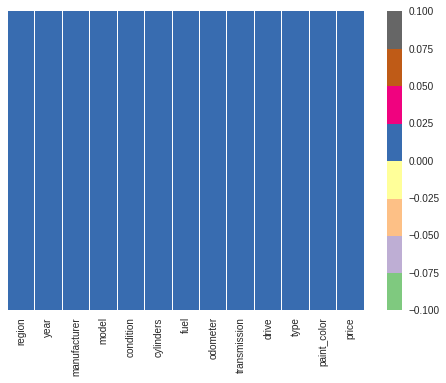

In [41]:
sns.heatmap(df1.isnull(),yticklabels=False,cbar=True,cmap='Accent')

In [42]:
df1.duplicated().any()

True

In [43]:
df1.duplicated().sum()

39694

In [44]:
df1.shape

(399883, 13)

In [45]:
df1.drop_duplicates(inplace=True)

In [46]:
df1.shape

(360189, 13)

In [47]:
df1.duplicated().sum()

0

# 3) Outliers

In [48]:
#it will return the range of the variables and the values outside this range will be outliers
def outliers(arr,col):
    x=sorted(arr[col].values.ravel())
    L_25=25/100*(len(x)+1) #L_p where p=25%
    i_p=int(str(L_25).split(".")[0])
    f_p=int(str(L_25).split(".")[1])
    q1=x[i_p]+f_p*(x[i_p+1]-x[i_p])
    
    L_75=75/100*(len(x)+1) #L_p where p=75%
    i_p=int(str(L_75).split(".")[0])
    f_p=int(str(L_75).split(".")[1])
    q3=x[i_p]+f_p*(x[i_p+1]-x[i_p])
    
    #q1,q3=(arr[col].quantile([0.25,0.75]))
    
    IQR=q3-q1
    x1=q1-1.5*IQR
    x2=q3+1.5*IQR
    return (x1,x2)

## 3.1) Price

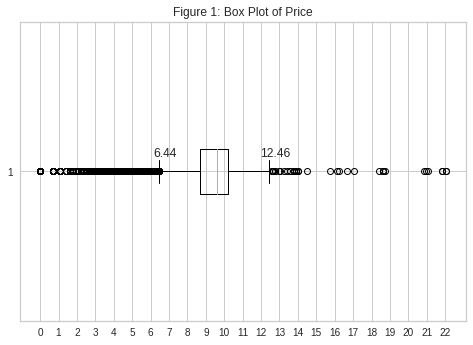

In [49]:
def min_max_price(data):
    r=[]
    q1,q3=(df1['logprice'].quantile([0.25,0.75]))
    r.append(q1-1.5*(q3-q1))
    r.append(q3+1.5*(q3-q1))
    return (r)
df1['logprice'] = np.log(df1['price'])
x=df1['logprice']
price_range=list(range(0,int(max(df1['logprice']))+1))
red_square = dict(markerfacecolor='g', marker='s')
plt.boxplot(x, vert=False)
plt.xticks(price_range)
plt.text(min_max_price(df1)[0]-0.3,1.05,str(round(min_max_price(df1)[0],2)))
plt.text(min_max_price(df1)[1]-0.5,1.05,str(round(min_max_price(df1)[1],2)))
plt.title("Figure 1: Box Plot of Price")
plt.savefig('graph-boxplot-price.jpg')
plt.show()

## 3.2) Odometer

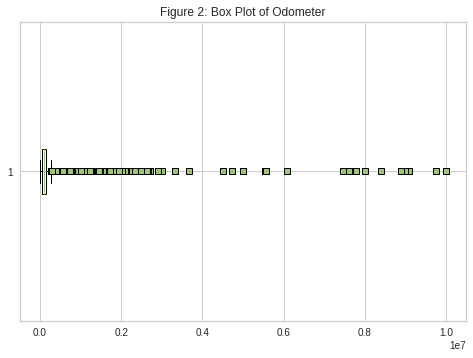

In [50]:
fig, ax1 = plt.subplots()
ax1.set_title('Figure 2: Box Plot of Odometer')
ax1.boxplot(df1['odometer'], vert=False, flierprops=red_square)
plt.savefig('graph-boxplot-odometer.jpg')
plt.show()

## 3.3) Year

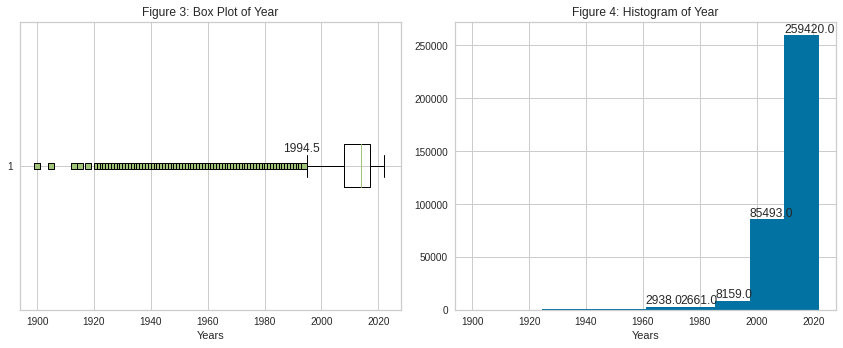

In [51]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))

#ploting boxplot
o1,o2=outliers(df1,'year')
ax1.boxplot(sorted(df1['year']), vert=False, flierprops=red_square)
ax1.set_xlabel("Years")
ax1.set_title("Figure 3: Box Plot of Year")
ax1.text(o1-8,1.05,str(round(o1,2)))

#ploting histogram
hist,bins=np.histogram(df1['year'])
n, bins, patches = ax2.hist(x=df1['year'], bins=bins)
ax2.set_xlabel("Years")
ax2.set_title("Figure 4: Histogram of Year")
for i in range(len(n)):
    if(n[i]>2000):
        ax2.text(bins[i],n[i]+3000,str(n[i]))

plt.tight_layout()
plt.savefig('graph-barplot-histogram-year.jpg',dpi=1200)
plt.show()

In [52]:
#removing outliers 
df_new=df1.copy()
out=np.array(['logprice','odometer','year'])
for col in out:
    o1,o2=outliers(df_new,col)
    df_new=df_new[(df_new[col]>=o1) & (df_new[col]<=o2)]
    print('IQR of',col,'=',o1,o2)
df_new=df_new[df_new['price']!=0]
df_new.drop('logprice',axis=1,inplace=True)

IQR of logprice = 6.443537610114657 12.459032163550486
IQR of odometer = -110912.0 282856.0
IQR of year = 1994.5 2030.5


In [53]:
df_new.head()

,region,year,manufacturer,model,condition,cylinders,fuel,odometer,transmission,drive,type,paint_color,price
27,auburn,2014.0,gmc,sierra 1500 crew cab slt,good,8 cylinders,gas,57923.0,other,4wd,pickup,white,33590
28,auburn,2010.0,chevrolet,silverado 1500,good,8 cylinders,gas,71229.0,other,4wd,pickup,blue,22590
29,auburn,2020.0,chevrolet,silverado 1500 crew,good,8 cylinders,gas,19160.0,other,4wd,pickup,red,39590
30,auburn,2017.0,toyota,tundra double cab sr,good,8 cylinders,gas,41124.0,other,4wd,pickup,red,30990
31,auburn,2013.0,ford,f-150 xlt,excellent,6 cylinders,gas,128000.0,automatic,rwd,truck,black,15000


In [54]:
df_new.shape

(314227, 13)

In [55]:
df_new.columns

Index(['region', 'year', 'manufacturer', 'model', 'condition', 'cylinders',
       'fuel', 'odometer', 'transmission', 'drive', 'type', 'paint_color',
       'price'],
      dtype='object')

In [56]:
print("Shape before process=",df.shape)
print("Shape After process=",df_new.shape)
diff=df.shape[0]-df_new.shape[0]
print("Total {} rows and {} cols removed".format(diff,df.shape[1]-df_new.shape[1]))
df_new.to_csv("vehiclesFinal.csv",index=False)

Shape before process= (426880, 25)
Shape After process= (314227, 13)
Total 112653 rows and 12 cols removed


## **Data Visualization**

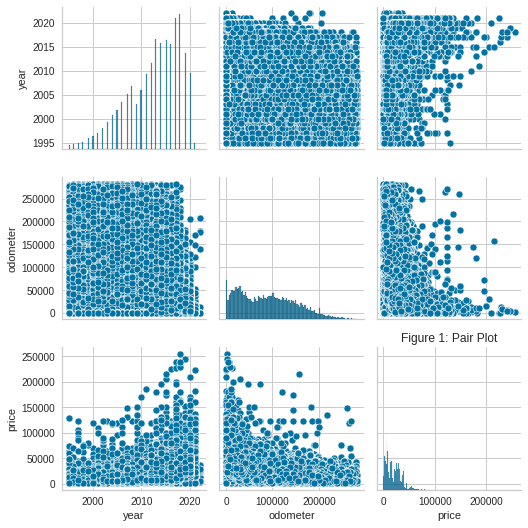

In [57]:
sns.pairplot(df_new)
plt.title('Figure 1: Pair Plot')
plt.tight_layout()
plt.savefig('Insight-Pair-Plot',dpi=None)
plt.show()

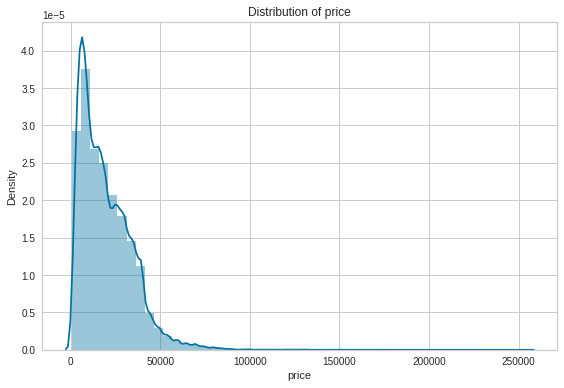

In [58]:
sns.distplot(df_new.price)
plt.tight_layout()
plt.title("Distribution of price")
plt.savefig('Insight-Dist-Plot',dpi=None)
plt.show()

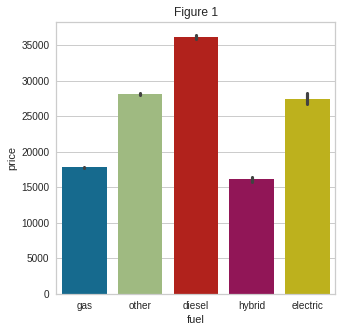

In [59]:
fig,axs=plt.subplots()
fig.set_size_inches(5,5)

p1=sns.barplot(x='fuel',y='price',data=df_new,ax=axs)
axs.set_title('Figure 1')

plt.savefig('Insight-Figure-1',dpi=None)
plt.show()

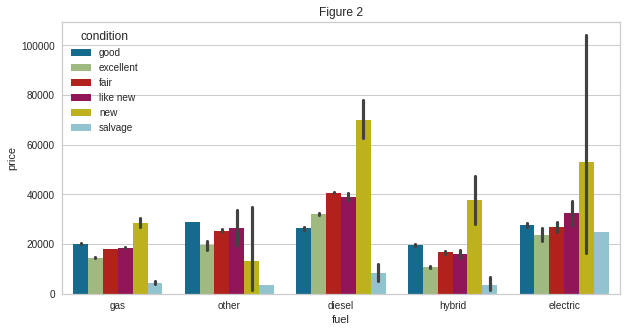

In [60]:
plt.figure(figsize=(10,5))
sns.barplot(x='fuel',y='price',hue='condition',data=df_new)
plt.title('Figure 2')
plt.savefig('Insight-Figure-2',dpi=None)
plt.show()

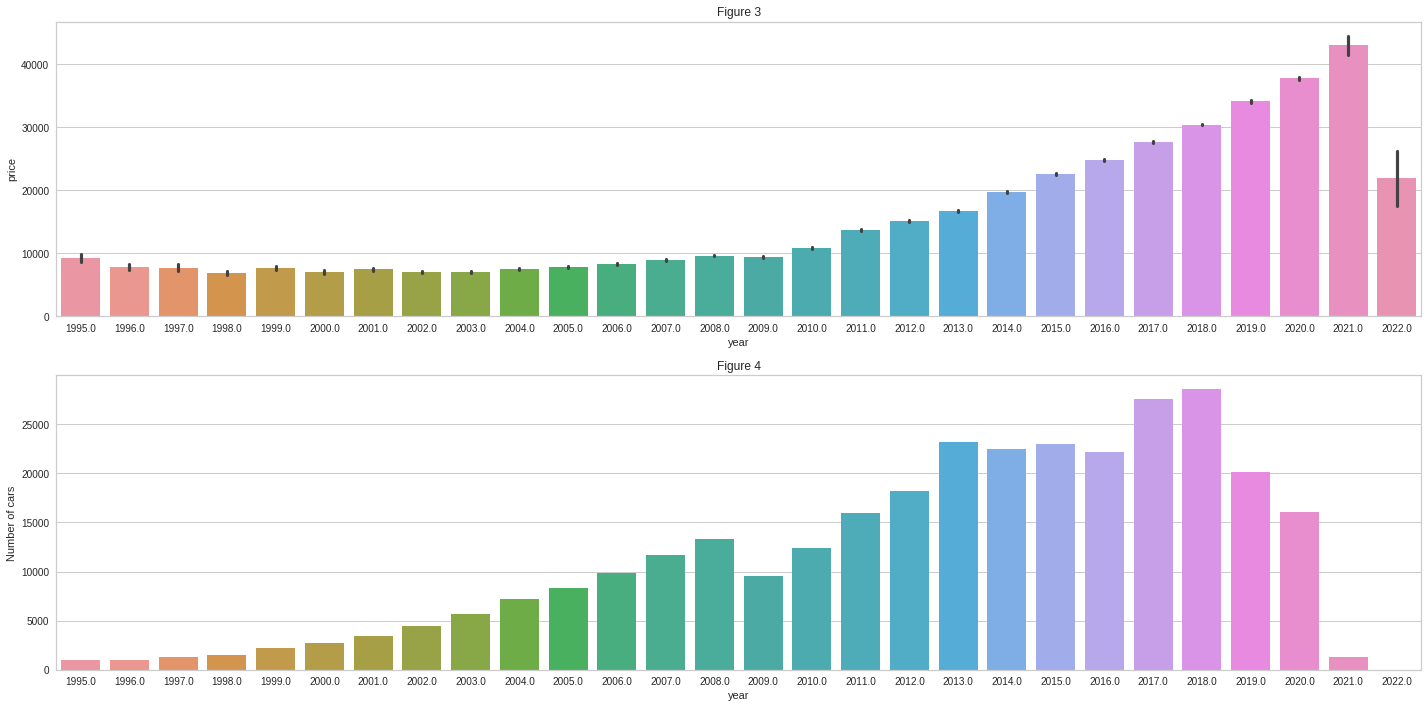

In [61]:
fig,axs=plt.subplots(nrows=2)
fig.set_size_inches(20,10)
sns.barplot(x='year',y='price',data=df_new,ax=axs[0])
sns.barplot(df_new.groupby('year').count()['price'].index,df_new.groupby('year').count()['price'].values,ax=axs[1])
axs[0].set_title('Figure 3')
axs[1].set_title('Figure 4')
axs[1].set_ylabel('Number of cars')
plt.tight_layout()
plt.savefig('Insight-Figure-3-4.jpg',dpi=600)
plt.show()

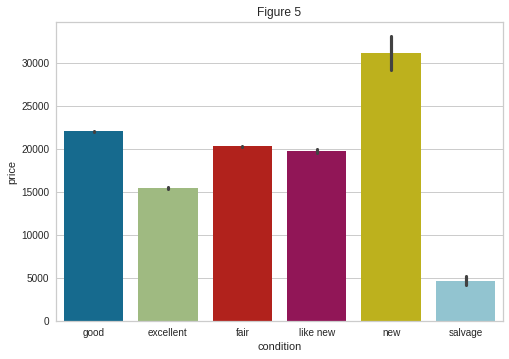

In [62]:
sns.barplot(x='condition',y='price',data=df_new)
plt.title('Figure 5')
plt.savefig('Insight-Figure-5.jpg',dpi=600)
plt.show()

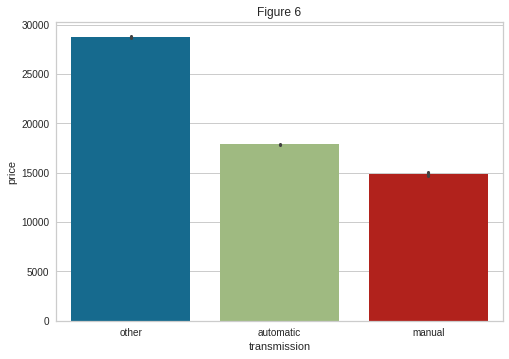

In [63]:
sns.barplot(x='transmission',y='price',data=df_new)
plt.title('Figure 6')
plt.savefig('Insight-Figure-6.jpg',dpi=600)
plt.show()

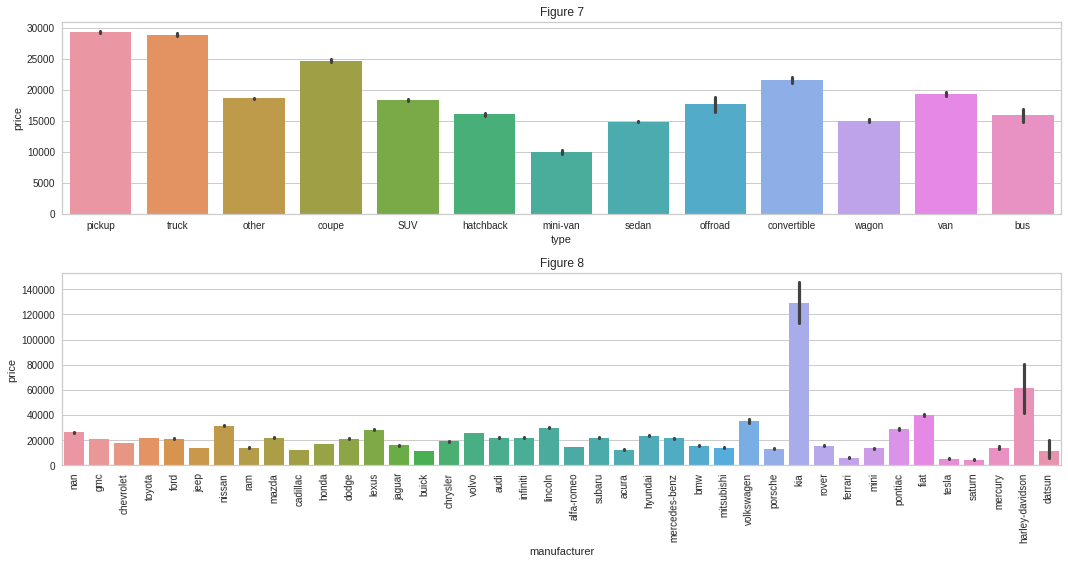

In [64]:
fig,axs=plt.subplots(nrows=2)
fig.set_size_inches(15,8)
sns.barplot(x='type',y='price',data=df_new,ax=axs[0])
sns.barplot(x='manufacturer',y='price',data=df_new,ax=axs[1])
axs[1].set_xticklabels(df.manufacturer.unique(),rotation=91)
axs[0].set_title('Figure 7')
axs[1].set_title('Figure 8')
plt.tight_layout()
plt.savefig('Insight-Figure-7-8.jpg',dpi=600)
plt.show()

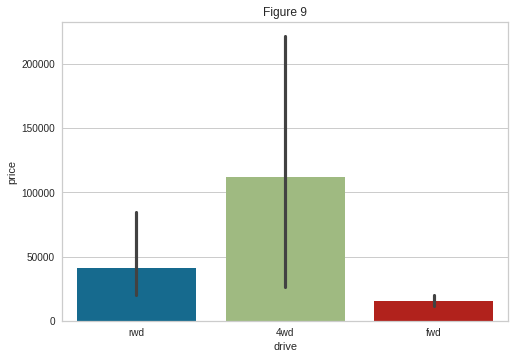

In [65]:
sns.barplot(x='drive',y='price',data=df)
plt.title('Figure 9')
plt.savefig('Insight-Figure-6.jpg',dpi=600)
plt.show()

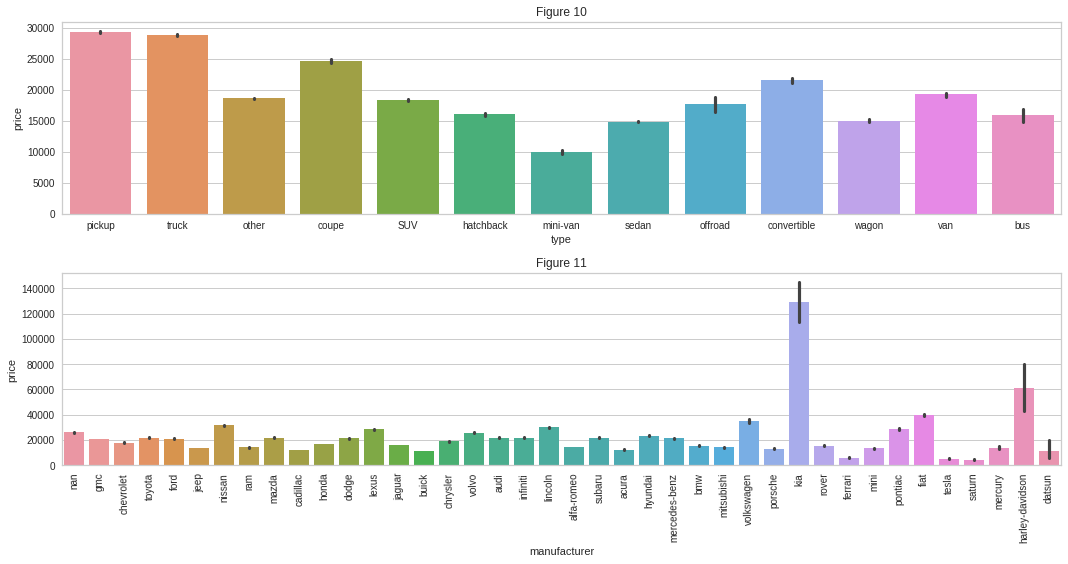

In [66]:
fig,axs=plt.subplots(nrows=2)
fig.set_size_inches(15,8)
sns.barplot(x='type',y='price',data=df_new,ax=axs[0])
sns.barplot(x='manufacturer',y='price',data=df_new,ax=axs[1])
axs[1].set_xticklabels(df.manufacturer.unique(),rotation=91)
axs[0].set_title('Figure 10')
axs[1].set_title('Figure 11')
plt.tight_layout()
plt.show()

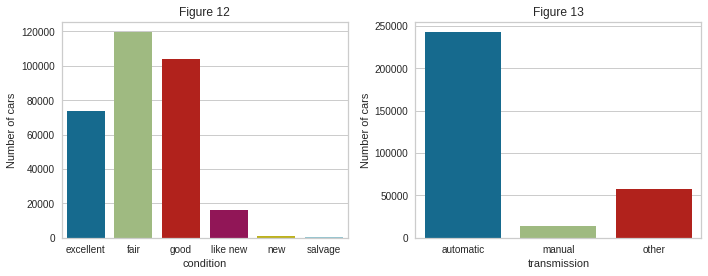

In [67]:
fig,axs=plt.subplots(ncols=2)
fig.set_size_inches(10,4)
sns.barplot(df_new.groupby('condition').count()['price'].index,df_new.groupby('condition').count()['price'].values,ax=axs[0])
sns.barplot(df_new.groupby('transmission').count()['price'].index,df_new.groupby('transmission').count()['price'].values,ax=axs[1])
axs[0].set_ylabel('Number of cars')
axs[0].set_title('Figure 12')
axs[1].set_ylabel('Number of cars')
axs[1].set_title('Figure 13')
plt.tight_layout()
plt.show()

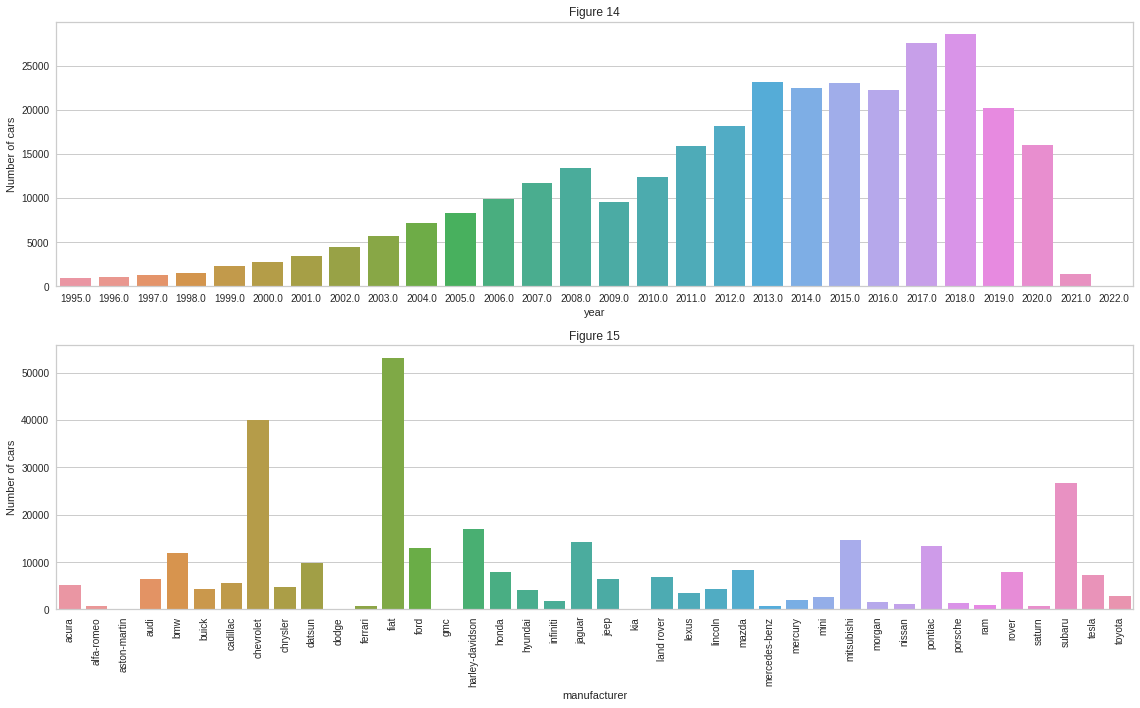

In [68]:
fig,axs=plt.subplots(nrows=2)
fig.set_size_inches(16,10)
sns.barplot(df_new.groupby('year').count()['price'].index,df_new.groupby('year').count()['price'].values,ax=axs[0])
sns.barplot(df_new.groupby('manufacturer').count()['price'].index,df_new.groupby('manufacturer').count()['price'].values,ax=axs[1])
axs[0].set_ylabel('Number of cars')
axs[0].set_title('Figure 14')
axs[1].set_ylabel('Number of cars')
axs[1].set_title('Figure 15')
axs[1].set_xticklabels(df.groupby('manufacturer').count()['price'].index,rotation=90)
plt.tight_layout()
plt.show()

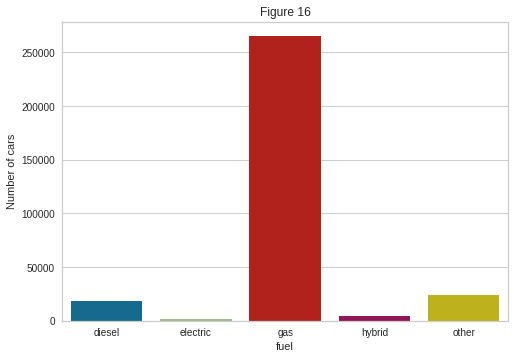

In [69]:
sns.barplot(df_new.groupby('fuel').count()['price'].index,df_new.groupby('fuel').count()['price'].values)
plt.title('Figure 16') 
plt.ylabel('Number of cars')   
plt.show()    

# Model Selection

In [70]:
df_new.dtypes

region           object
year            float64
manufacturer     object
model            object
condition        object
cylinders        object
fuel             object
odometer        float64
transmission     object
drive            object
type             object
paint_color      object
price             int64
dtype: object

In [71]:
#defining numerical and categorical values

num_col=['year','odometer']
cat_cols=['region','manufacturer','model','condition','cylinders','fuel','transmission','drive','type','paint_color']

# 1) Transforming categorical columns values into integer values

In [72]:
le=preprocessing.LabelEncoder()
df_new[cat_cols]=df_new[cat_cols].apply(le.fit_transform)


In [73]:
df_new.head(2)

,region,year,manufacturer,model,condition,cylinders,fuel,odometer,transmission,drive,type,paint_color,price
27,16,2014.0,13,15595,2,6,2,57923.0,2,0,8,10,33590
28,16,2010.0,7,15931,2,6,2,71229.0,2,0,8,1,22590


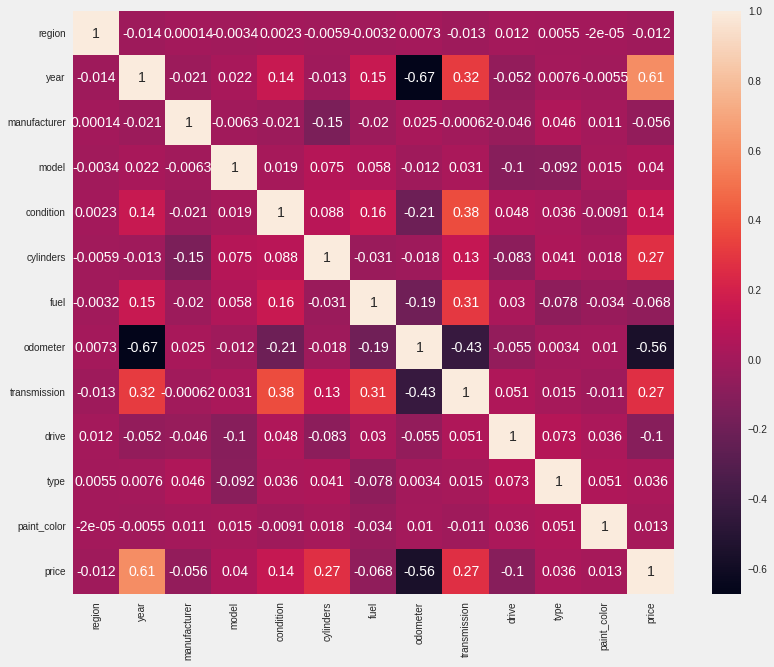

In [98]:
plt.figure(figsize = (12,10))
sns.heatmap(df_new.corr(), annot = True)
plt.show()


# 2) Train and Test data split

In [74]:
X=df_new.drop('price',axis=1)
y=df_new['price'].values.T

In [75]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=13)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((251381, 12), (62846, 12), (251381,), (62846,))

In [76]:
#some of models will predict neg values so this function will remove that values
def remove_neg(y_test,y_pred):
    ind=[index for index in range(len(y_pred)) if(y_pred[index]>0)]
    y_pred=y_pred[ind]
    y_test=y_test[ind]
    y_pred[y_pred<0]
    return (y_test,y_pred)

#function for evaluation of model
def result(y_test,y_pred):
    r=[]
    r.append(mean_squared_log_error(y_test, y_pred))
    r.append(np.sqrt(r[0]))
    r.append(r2_score(y_test,y_pred))
    r.append(round(r2_score(y_test,y_pred)*100,4))
    return (r)

#dataframe that store the performance of each model
accu=pd.DataFrame(index=['MSLE', 'Root MSLE', 'R2 Score','Accuracy(%)'])  

# 3) Model Implementation
### 1)Linear Regression
### 2)Ridge Regression
### 3)Random Forest Regressor
### 4)XGBoost

## 3.1) Linear Regression

In [77]:
#fitting model
LR=LinearRegression()
LR.fit(X_train,y_train)
y_pred=LR.predict(X_test)

In [78]:
#calculating error/accuracy
y_test_1,y_pred_1=remove_neg(y_test,y_pred)
r1_lr=result(y_test_1,y_pred_1)
print('Coefficients: \n', LR.coef_)
print("MSLE : {}".format(r1_lr[0]))
print("Root MSLE : {}".format(r1_lr[1]))
print("R2 Score : {} or {}%".format(r1_lr[2],r1_lr[3]))
accu['Linear Regression']=r1_lr

Coefficients: 
 [-1.96865861e-01  1.11408222e+03 -1.50693397e+01  3.02934548e-02
  2.58562105e+02  3.80015570e+03 -3.63867317e+03 -7.08537925e-02
  6.37058767e+02 -1.54605838e+03  6.07455716e+01  3.66629578e+01]
MSLE : 0.4187791380471682
Root MSLE : 0.6471314689050195
R2 Score : 0.5271518032917366 or 52.7152%


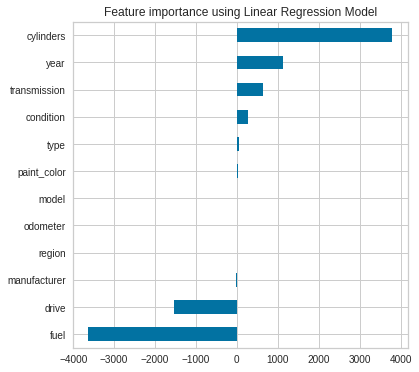

In [79]:
#Ploting feature importance graph

coef = pd.Series(LR.coef_, index = X_train.columns)
imp_coef = coef.sort_values()
matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Linear Regression Model")
plt.savefig('Linear-Regression-Feature-Importance.jpg')
plt.show()

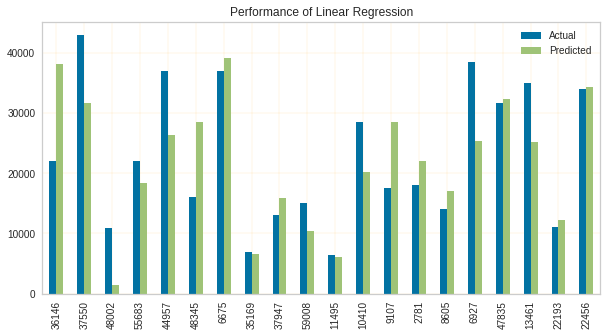

In [80]:
#Visualization of true value and predicted

df_check = pd.DataFrame({'Actual': y_test_1, 'Predicted': y_pred_1})
df_check = df_check.sample(20)
df_check.plot(kind='bar',figsize=(10,5))
plt.grid(which='major', linestyle='-', linewidth='0.1', color='orange')
plt.title('Performance of Linear Regression')
plt.savefig('Linear-Regression-Performance')
plt.show()

## 3.2) Ridge Regression

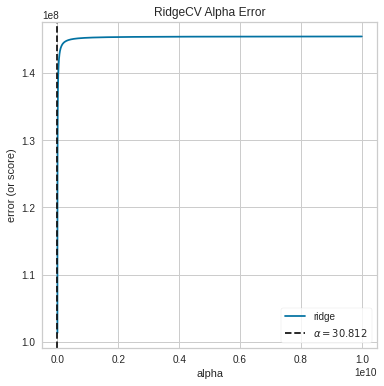

In [81]:
#predicting value of alpha

alphas = 10**np.linspace(10,-2,400)
model = RidgeCV(alphas=alphas)
visualizer = AlphaSelection(model)
visualizer.fit(X_train,y_train)
visualizer.show()

In [82]:
#model object and fitting model
RR=Ridge(alpha=20.336,solver='auto')
RR.fit(X_train,y_train)
y_pred=RR.predict(X_test)

In [83]:
#model evaluation

y_test_2,y_pred_2=remove_neg(y_test,y_pred)
r2_ridge=result(y_test_2,y_pred_2)
print("MSLE : {}".format(r2_ridge[0]))
print("Root MSLE : {}".format(r2_ridge[1]))
print("R2 Score : {} or {}%".format(r2_ridge[2],r2_ridge[3]))
accu['Ridge Regression']=r2_ridge

MSLE : 0.41853466044355764
Root MSLE : 0.6469425480238239
R2 Score : 0.5271491774884522 or 52.7149%


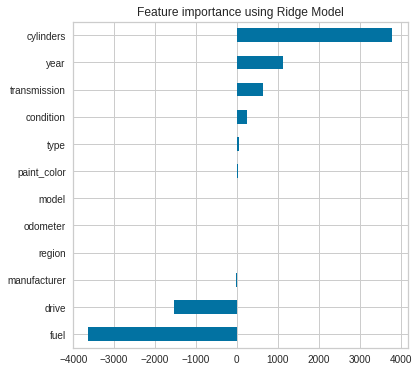

In [84]:
#Visualization of Feature Importance

coef = pd.Series(RR.coef_, index = X_train.columns)
imp_coef = coef.sort_values()
matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Ridge Model")
plt.savefig('Ridge-Regression-Feature-Importance.jpg')
plt.show()

## 3.3) Random Forest

In [85]:
RFR = RandomForestRegressor(n_estimators=180,random_state=0, min_samples_leaf=1, max_features=0.5, n_jobs=-1, oob_score=True)
RFR.fit(X_train,y_train)
y_pred = RFR.predict(X_test)

In [86]:
r5_rf=result(y_test,y_pred)
print("MSLE : {}".format(r5_rf[0]))
print("Root MSLE : {}".format(r5_rf[1]))
print("R2 Score : {} or {}%".format(r5_rf[2],r5_rf[3]))
accu['RandomForest Regressor']=r5_rf

MSLE : 0.12038374232388689
Root MSLE : 0.34696360374524426
R2 Score : 0.8979363710261457 or 89.7936%


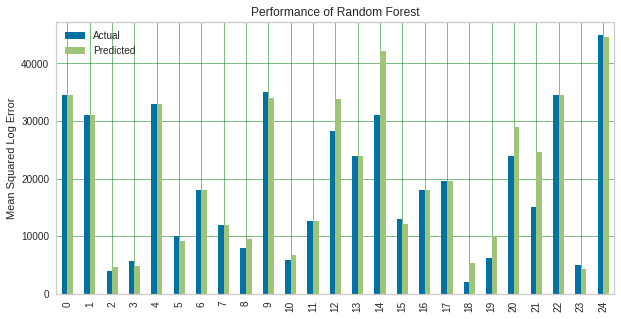

In [87]:
df_check = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_check = df_check.head(25)
#round(df_check,2)
df_check.plot(kind='bar',figsize=(10,5))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.title('Performance of Random Forest')
plt.ylabel('Mean Squared Log Error')
plt.savefig('Random-Forest-Performance.jpg')
plt.show()

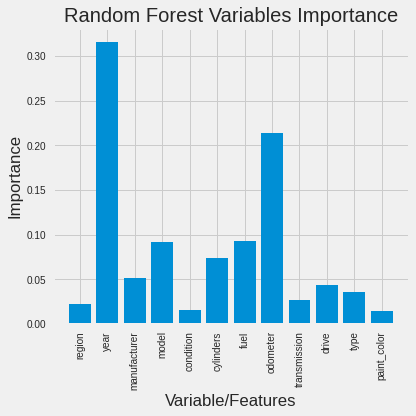

In [88]:
importances=RFR.feature_importances_
features=X_train.columns

# Set the style
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.figure(figsize=(6,6))
plt.bar(x_values, importances, orientation = ('vertical'))
# Tick labels for x axis
plt.xticks(x_values, features, rotation=(90))
# Axis labels and title
plt.ylabel('Importance'); 
plt.xlabel('Variable/Features'); 
plt.title('Random Forest Variables Importance')
plt.tight_layout()
plt.savefig('Random-Forest-Variables-Importances.jpg',dpi=600)
plt.show();

## 3.4) XG Boost

In [89]:
#model implementation and fitting data
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', learning_rate = 0.4,
                max_depth = 24, alpha = 5, n_estimators = 200)
xg_reg.fit(X_train,y_train)
y_pred = xg_reg.predict(X_test)

In [90]:
#model evaluation
y_test_1,y_pred_1=remove_neg(y_test,y_pred)
r8_xg=result(y_test_1,y_pred_1)
print("MSLE : {}".format(r8_xg[0]))
print("Root MSLE : {}".format(r8_xg[1]))
print("R2 Score : {} or {}%".format(r8_xg[2],r8_xg[3]))

MSLE : 0.11970419808888394
Root MSLE : 0.34598294479480335
R2 Score : 0.8855286817384314 or 88.5529%


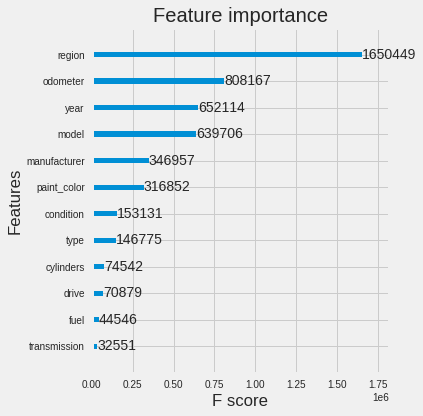

In [91]:
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [5, 5]
plt.tight_layout()
plt.savefig('XGBoost-Features-Importance.jpg')
plt.show();

In [92]:
accu['XGBoost Regressor']=r8_xg
accu.to_csv('errors.csv')

# Overall Result

In [93]:
accu=pd.read_csv('./errors.csv',index_col=0)
accu

,Linear Regression,Ridge Regression,RandomForest Regressor,XGBoost Regressor
MSLE,0.418779,0.418535,0.120384,0.119704
Root MSLE,0.647131,0.646943,0.346964,0.345983
R2 Score,0.527152,0.527149,0.897936,0.885529
Accuracy(%),52.715200,52.714900,89.793600,88.552900


In [94]:
model_accuracy=accu.loc['Accuracy(%)']

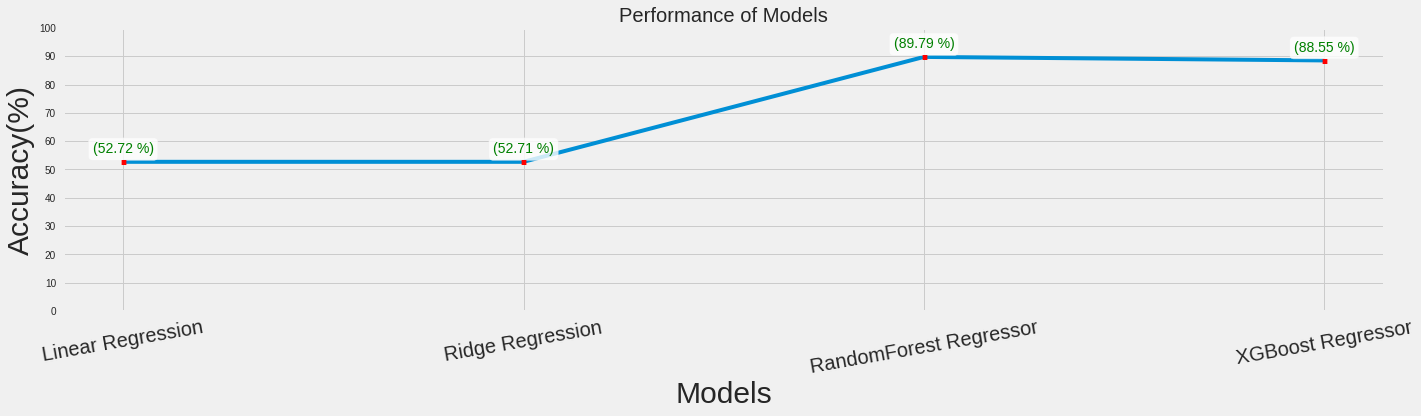

In [95]:
x=list(range(len(model_accuracy)))
y=list(range(0,101,10))
props = dict(boxstyle='round', facecolor='white', alpha=0.8)
plt.figure(figsize=(20,6))
plt.plot(model_accuracy)
plt.yticks(y)
plt.xticks(fontsize=20)
plt.xticks(rotation = (10))
plt.xlabel("Models",fontsize=30)
plt.ylabel("Accuracy(%)",fontsize=30)
plt.title("Performance of Models")
for a,b in zip(x,y):
    b=model_accuracy[a]
    val="("+str(round(model_accuracy[a],2))+" %)"
    plt.text(a, b+4.5, val,horizontalalignment='center',verticalalignment='center',color='green',bbox=props)
    plt.text(a, b+3.5, '.',horizontalalignment='center',verticalalignment='center',color='red',fontsize=50)
plt.tight_layout()
plt.savefig('Overall-Performance.jpg',dpi=600)
plt.show();